In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import src
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Init Agent

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
model = nn.Sequential(
    nn.Linear(16, 16),
    nn.Hardsigmoid(),
    nn.Linear(16, 8),
    nn.Hardsigmoid(),
    nn.Linear(8, 4),
    nn.Hardsigmoid(),
    nn.Linear(4, 2),
    nn.Hardsigmoid(),
    nn.Linear(2, 1),
    nn.Hardsigmoid(),
)

In [4]:
value_func = src.value_func.NNFunc(model, device)

In [5]:
agent = src.Agent(value_func)

In [6]:
batch_size = int(1e4)
num_games = 1000
eps_start = 1
eps_end = .005
eps_decay = 150
loss_func = F.smooth_l1_loss
optimizer = optim.Adam(model.parameters())
game = src.Game(batch_size, device=device)
session = agent.init_training_session(num_games, game, eps_start, eps_end, eps_decay, loss_func=loss_func, optimizer=optimizer)

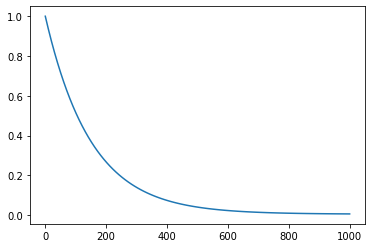

In [7]:
x = numpy.linspace(0, num_games, 100)
y = numpy.array([agent.eps_func(index, eps_start, eps_end, eps_decay) for index in x])
plt.plot(x, y);

In [8]:
record = pandas.DataFrame(numpy.zeros((num_games, 3)), columns=['Time (s)', 'Mean Score', 'Std'])

In [9]:
for index, game_time, mean, std in session:
    record.loc[index, 'Time (s)'] = game_time
    record.loc[index, 'Mean Score'] = mean
    record.loc[index, 'Std'] = std
    if index % 100 == 0:
        print(index, game_time, mean, std)

0 5.715184450149536 1100.7379150390625 536.9246826171875
100 649.0190870761871 1422.1951904296875 663.15234375
200 1381.2385833263397 1620.8023681640625 749.4258422851562
300 2181.4502243995667 1832.9407958984375 859.7289428710938
400 3062.8423688411713 2085.0888671875 992.8890380859375
500 4112.205425262451 2365.67822265625 1161.5098876953125
600 5288.812297105789 2602.67236328125 1311.3536376953125
700 6555.769366502762 2738.4423828125 1368.421875
800 7840.929257392883 2879.544677734375 1435.3514404296875
900 9144.891243219376 2892.58154296875 1436.890625


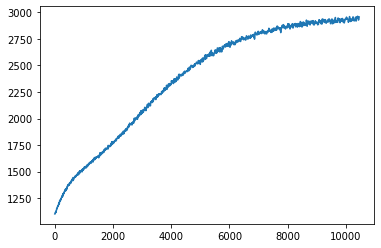

In [12]:
plt.plot(record['Time (s)'], record['Mean Score'])

In [13]:
record.to_csv('records/LinearHS.csv')

In [14]:
torch.save(model.state_dict(), 'models/LinearHS.pt')